<a href="https://colab.research.google.com/github/katdask/Data_Science_Projects/blob/main/Facial_Attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip -u "/content/drive/My Drive/facial_attributes/archive (1).zip" -d "/content/drive/My Drive/facial_attributes/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: /content/drive/My Drive/facial_attributes/data/img_align_celeba/img_align_celeba

In [2]:
%cd /content/drive/My Drive/facial_attributes/

/content/drive/My Drive/facial_attributes


In [12]:
celebs=pd.read_csv("metadata/list_attr_celeba.csv")
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [13]:
celebs["image_id"]='data/img_align_celeba/img_align_celeba/' + celebs["image_id"].astype(str)
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,data/img_align_celeba/img_align_celeba/000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,data/img_align_celeba/img_align_celeba/000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,data/img_align_celeba/img_align_celeba/000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,data/img_align_celeba/img_align_celeba/000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,data/img_align_celeba/img_align_celeba/000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [31]:
img=mpimg.imread(celebs["image_id"][47000])
img.shape

(218, 178, 3)

In [32]:
img_crop=img[20:198,:,:]
img_crop.shape

(178, 178, 3)

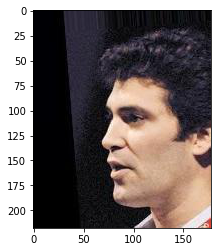

In [33]:
plt.imshow(img)

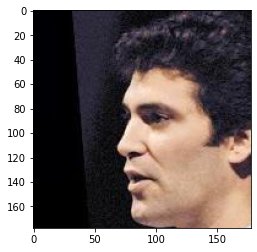

In [34]:
plt.imshow(img_crop)

In [36]:
# create X, crop to square & normalization
my_list=[]
for i in range(47000):
    img=mpimg.imread(celebs["image_id"][i])
    img=img[20:198,:,:]
    my_list.append(img/255)

KeyboardInterrupt: ignored